# Stability of Planetary Orbits in Binary Star Systems: S-type orbits

Anwesha Dey

# MOTIVATION
Many exoplanets are discovered in binary star systems.

Habitability of these planets would depend on dynamical properties of the planetary orbit.

Types of orbits possible in binary star systems:
1. Planet-type (P-type) external orbits around both stars in the binary
2. Satellite-type (S-type) internal orbits around one of the two stars
3. Libration-type (L-type) orbits around the Lagrangian equillibrium points $L_4$ and $L_5$.These are stable when the stellar mass ratio $\frac{m_1}{m_1 + m_2}$ is less than $\approx 0.04$. 

# PROBLEM STATEMENT

Trajectory of a planet in a double star system: till what critical semi-major axis $a_c$ will the planet have a stable S-type orbit.

A planetary system is made up by two stars: primary star A and secondary star B, in elliptical motion in the center of mass frame of the two stars. 

Distance of the planet from the primary star plays a crucial role on stability. The farther the planet from the primary star, the stronger the perturbation due to star B, so the orbit can eventually become unstable.

The unperturbed circular orbit is characterised by the initial transverse speed of the planet-
$$
v_P = \sqrt{G \frac{m_A + m_P}{r}}
$$
where r is the initial distance of the planet from the primary star, $m_P$ is the mass of the planet, and $m_A$ is the mass of the primary star.

The mass ratio and eccentricity of the binary system and the initial semi-major axis of he planet orbit are free parameters.

For equal mass stars, $\mu = 0.5$. The smaller the $\mu$ the lower the gravitational perturbatin due to the secondary star.

# Simplest Approach

Assumptions:
1. Assume all are point particles
2. All the bodies constrained to a plane
3. The planet has a negligible mass (test mass) and doesnt affect the orbit of the stars
4. The planet starts off with a nearly circular orbit around the Star A, orbit has some distortion due to perturbation from Star B. 

We want to find the trajectories of the 3 bodies from where we can find average deviation $< \Delta r(t) - r_i >$ from the circular orbit for a given initial radius $r_i$ and check at which point it starts to become unstable.

What can happen if the orbit becomes unstable is, it might collide with one of the two stars. Or it might escape the system.

In case of a stable orbit, it will keep orbiting in a ring of some width around the unperturbed orbit.


# CODE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

# SOLVER

In [115]:
# RK4 Method
def RK4(func, t_arr, v0):
    """
    Solves a set coupled differential equations.
    
    Arguments: 
    
    func: function which gives the RHS of the coupled DEs
    
    t_arr: nd array
    The values of independent variable at which the dependent variables are calculated
    
    v0: nd array
    initial values of dependent variables
    """
    
    dim = len(v0)            #No. of coupled dependent variables
    h = t_arr[1] - t_arr[0]     #resolution 
    n = len(t_arr)              #no. of points of independent variable
    
    Y = np.zeros((dim,n))
    Y[:,0]= v0[:] 
    
    
    for j in range(1,n):
            
            k1 = h*func(t_arr[j-1], Y[:,j-1])
            k2 = h*func((t_arr[j-1]+h/2), (Y[:,j-1]+k1/2))
            k3 = h*func((t_arr[j-1]+h/2), (Y[:,j-1]+k2/2))
            k4 = h*func((t_arr[j-1]+h), (Y[:,j-1]+k3))
            
            Y[:,j] = Y[:,j-1] + (1/6)*(k1+2*k2+2*k3+k4)
            
            if any(Y[:,j] == np.inf) == True:
                break
            
    return Y      


#Some suggested changes: instead of putting times at input, give a relative h as input and keep reducing it to test for convergence.

# DYNAMICS OF A SINGLE LIGHT BODY UNDER INFLUENCE OF A MASSIVE BODY

In [116]:
G = 6.67e-11
ms = 2e30
me = 5.9e24
AU = 1.5e11
pc = 3.08e16
yr = 365.4*24*3600

M = ms
m = me

x0 = 0 
y0 = AU 
z0 = 0 

v = np.sqrt(G*(M+m)/(np.sqrt(x0**2 + y0**2 + z0**2)))

vx0 = -v
vy0 = 0
vz0 = 0 

P1 = 2*np.pi*np.sqrt(x0**2 + y0**2 + z0**2)/v
P1

31603719.720018063

In [117]:
eps = 1e-5*AU
def coupledDE(t, xvec):
    x,y,z,vx,vy,vz = xvec
    
    r = np.sqrt(eps**2 + x**2 + y**2 + z**2)
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    dvxdt = G*M*(-x)/r**3 
    dvydt = G*M*(-y)/r**3
    dvzdt = G*M*(-z)/r**3 
    
    return np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])

In [118]:
N1 = 500
Tmax1 = 6*P1
times1 = np.linspace(0,Tmax1,N1)
inits1 = [x0,y0,z0, vx0, vy0, vz0]
h = times1[1] - times1[0]
h

380004.6459320809

# USING SOLVE_IVP

In [119]:
solve1 = integrate.solve_ivp(coupledDE, t_span = [0, Tmax1], y0=inits1, t_eval=times1)

x = solve1.y[0]
y = solve1.y[1]
z = solve1.y[2]

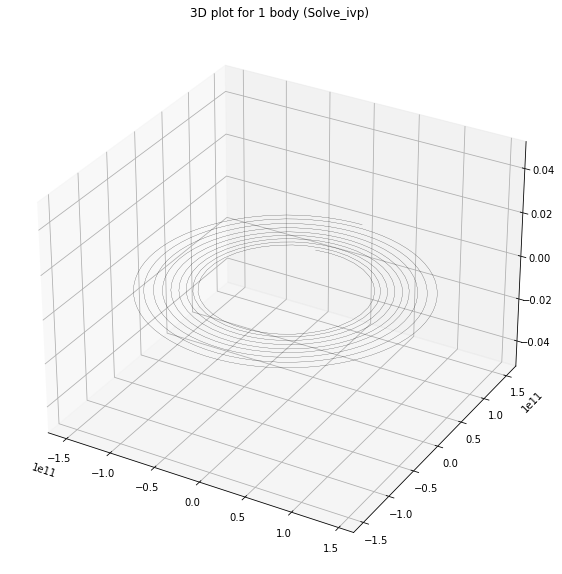

In [120]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x,y,z,'k-', linewidth = 0.2)
ax.set_title('3D plot for 1 body (Solve_ivp)')
plt.show()

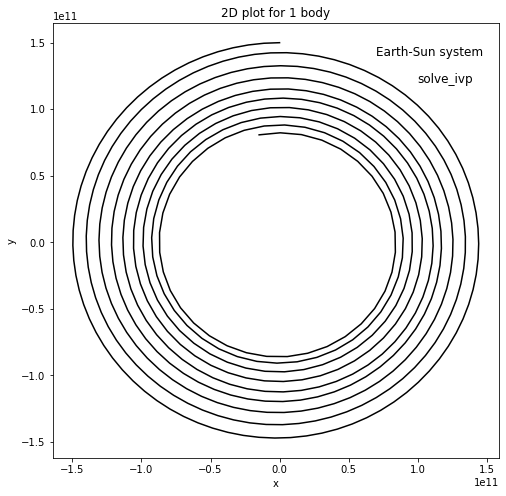

In [121]:
plt.figure(figsize = (8,8))
plt.plot(x, y, 'k-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('2D plot for 1 body')
plt.text(0.7e11, 1.4e11, 'Earth-Sun system', fontsize = 12)
plt.text(1e11, 1.2e11, 'solve_ivp', fontsize = 12)
plt.show()

# SOLVER DEFINED BEFORE

In [122]:
solve1_ = RK4(coupledDE, t_arr=times1, v0=inits1 )



x_ = solve1_[0]
y_ = solve1_[1]
z_ = solve1_[2]


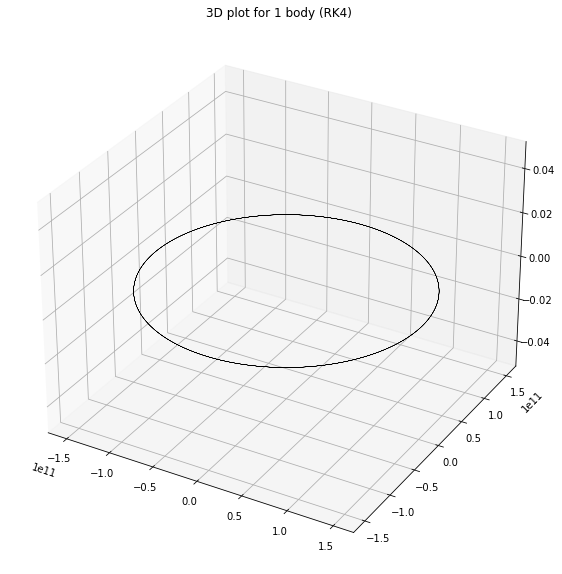

In [123]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x_,y_,z_,'k-', linewidth = 0.2)
ax.set_title('3D plot for 1 body (RK4)')
plt.show()

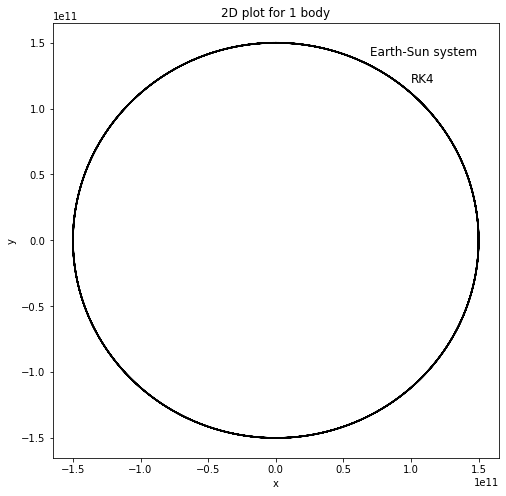

In [124]:
plt.figure(figsize = (8,8))
plt.plot(x_, y_, 'k-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('2D plot for 1 body')
plt.text(0.7e11, 1.4e11, 'Earth-Sun system', fontsize = 12)
plt.text(1e11, 1.2e11, 'RK4', fontsize = 12)
plt.show()

# DYNAMICS OF THE BINARY STAR SYSTEM

In [288]:
#mass of the bodies 
m1 = ms
m2 = ms

#initial Parameters
# positions wrt the center of mass 
x10 = 5*AU
x20 = -5*AU
y10 = 0
y20 = 0
z10 = 0
z20 = 0

v_binary = np.sqrt((G*m1)/(4*np.sqrt(x10**2+ y10**2 + z10**2)))

#velocities of the bodies in com frame 
v1x0 = 0
v2x0 = 0
v1y0 = -v_binary
v2y0 = v_binary
v1z0 = 0
v2z0 = 0


P2 = 2*np.pi*np.sqrt(x10**2 + y10**2 + z10**2)/v_binary
P2

v_binary

6668.333125052067

In [126]:

def coupledDE_2body(t, xvec):
    x1,y1,z1,x2,y2,z2, v1x, v1y, v1z, v2x, v2y, v2z = xvec
    r = np.sqrt(eps**2 + (x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
    dx1dt = v1x
    dy1dt = v1y
    dz1dt = v1z
    dx2dt = v2x
    dy2dt = v2y
    dz2dt = v2z
    dv1xdt = G*m2*(x2-x1)/r**3
    dv1ydt = G*m2*(y2-y1)/r**3
    dv1zdt = G*m2*(z2-z1)/r**3
    dv2xdt = G*m1*(x1-x2)/r**3
    dv2ydt = G*m1*(y1-y2)/r**3
    dv2zdt = G*m1*(z1-z2)/r**3
    return np.array([dx1dt, dy1dt, dz1dt, dx2dt, dy2dt, dz2dt, dv1xdt, dv1ydt, dv1zdt, dv2xdt, dv2ydt, dv2zdt])


In [127]:
N2 = 500
Tmax2= 6*P2
times2 = np.linspace(0,Tmax2,N2)
inits2 = [x10, y10, z10, x20, y20, z20, v1x0, v1y0, v1z0, v2x0, v2y0, v2z0]
h2 = times2[1] - times2[0]
h2

8497174.73400372

# SOLVE_IVP

In [128]:
solve2 = integrate.solve_ivp(coupledDE_2body, t_span = [0, Tmax2], y0=inits2, t_eval=times2)

x1 = solve2.y[0]
y1 = solve2.y[1]
z1 = solve2.y[2]
x2 = solve2.y[3]
y2 = solve2.y[4]
z2 = solve2.y[5]

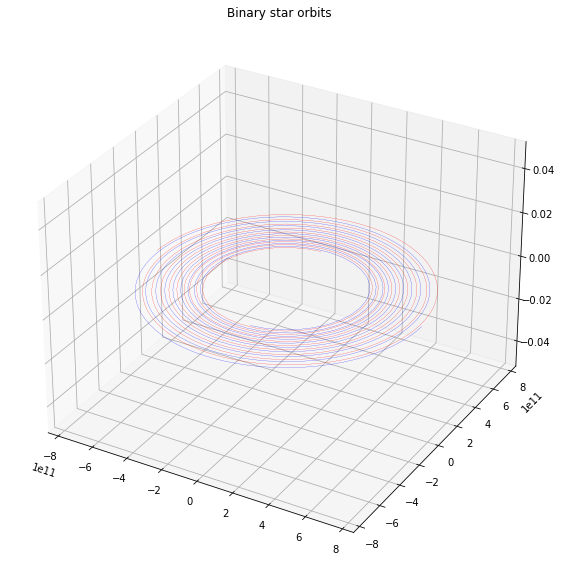

In [129]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x1,y1,z1,'b-', linewidth = 0.2)
ax.plot3D(x2,y2,z2,'r-', linewidth = 0.2)
ax.set_title('Binary star orbits')
plt.show()

# RK4

In [130]:
solve2_ = RK4(coupledDE_2body, t_arr=times2, v0=inits2 )



x1_ = solve2_[0]
y1_ = solve2_[1]
z1_ = solve2_[2]
x2_ = solve2_[3]
y2_ = solve2_[4]
z2_ = solve2_[5]

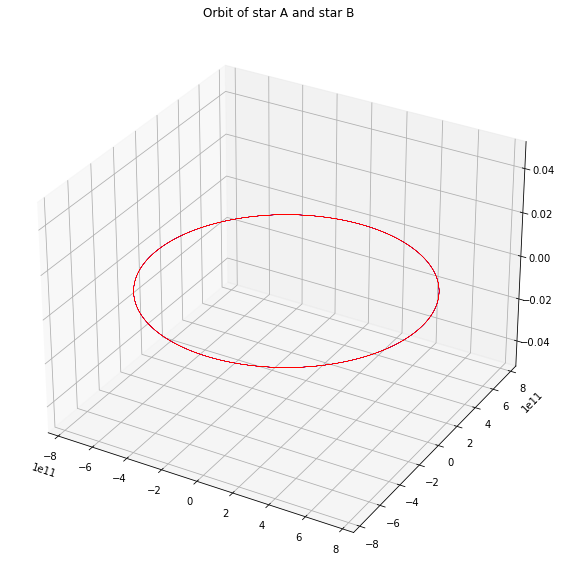

In [131]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x1_,y1_,z1_,'b-', linewidth = 0.2)
ax.plot3D(x2_,y2_,z2_,'r-', linewidth = 0.2)
ax.set_title('Orbit of star A and star B')
plt.show()

# PLANET IN BINARY STAR SYSTEM

In [132]:
m3 = me

x30 = 0 + x10
y30 = 1*AU + y10
z30 = 0 + z10

v_planet = np.sqrt(G*(m1+m3)/np.sqrt((x30-x10)**2 + (y30-y10)**2 + (z30-z10)**2))

v3x0 = -v_planet + v1x0
v3y0 = 0 + v1y0
v3z0 = 0 + v1z0

v_planet

29821.7363154238

In [133]:
def coupledDE_3body(t, xvec):
    
    x1,y1,z1,x2,y2,z2, x3,y3,z3, v1x, v1y, v1z, v2x, v2y, v2z, v3x, v3y, v3z = xvec
    
    r12 = np.sqrt(eps**2 + (x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
    r13 = np.sqrt(eps**2 + (x3-x1)**2 + (y3-y1)**2 + (z3-z1)**2)
    r23 = np.sqrt(eps**2 + (x2-x3)**2 + (y2-y3)**2 + (z2-z3)**2)
    
    dx1dt = v1x
    dy1dt = v1y
    dz1dt = v1z
    
    dx2dt = v2x
    dy2dt = v2y
    dz2dt = v2z
    
    dx3dt = v3x
    dy3dt = v3y
    dz3dt = v3z
    
    dv1xdt = G*m2*(x2-x1)/r12**3 + G*m3*(x3-x1)/r13**3
    dv1ydt = G*m2*(y2-y1)/r12**3 + G*m3*(y3-y1)/r13**3
    dv1zdt = G*m2*(z2-z1)/r12**3 + G*m3*(z3-z1)/r13**3
    
    dv2xdt = G*m1*(x1-x2)/r12**3 + G*m3*(x3-x2)/r23**3
    dv2ydt = G*m1*(y1-y2)/r12**3 + G*m3*(y3-y2)/r23**3
    dv2zdt = G*m1*(z1-z2)/r12**3 + G*m3*(z3-z2)/r23**3
    
    dv3xdt = G*m1*(x1-x3)/r13**3 + G*m2*(x2-x3)/r23**3
    dv3ydt = G*m1*(y1-y3)/r13**3 + G*m2*(y2-y3)/r23**3
    dv3zdt = G*m1*(z1-z3)/r13**3 + G*m2*(z2-z3)/r23**3
    
    return np.array([dx1dt, dy1dt, dz1dt, dx2dt, dy2dt, dz2dt, dx3dt, dy3dt, dz3dt, dv1xdt, dv1ydt, dv1zdt, dv2xdt, dv2ydt, dv2zdt, dv3xdt, dv3ydt, dv3zdt])


In [289]:
N3 = 50000
Tmax3= 6*P2
times3 = np.linspace(0,Tmax3,N3)
# h3 = times3[1] - times3[0]

inits_3body = [x10,y10,z10, x20,y20,z20, x30,y30,z30, v1x0, v1y0, v1z0, v2x0, v2y0, v2z0, v3x0, v3y0, v3z0]

# h3
# times3

# inits_3body

In [135]:
# P2/P1

In [136]:
solve_3body_ = RK4(coupledDE_3body, t_arr=times3, v0=inits_3body )

x1_ = solve_3body_[0]
y1_ = solve_3body_[1]
z1_ = solve_3body_[2]

x2_ = solve_3body_[3]
y2_ = solve_3body_[4]
z2_ = solve_3body_[5]

x3_ = solve_3body_[6]
y3_ = solve_3body_[7]
z3_ = solve_3body_[8]

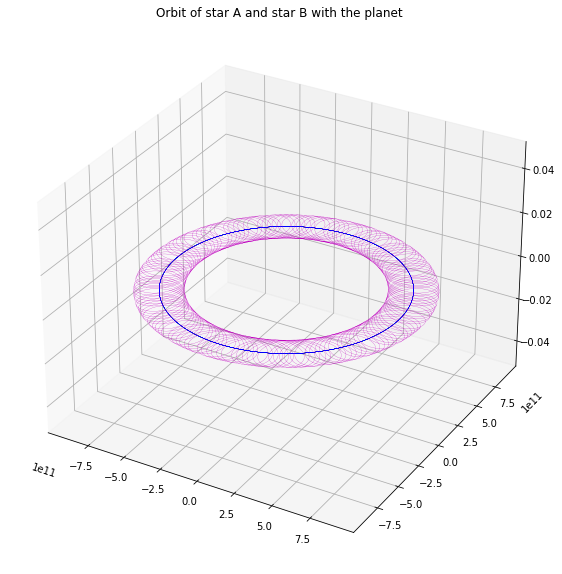

In [211]:
l = N3

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x1_[:l],y1_[:l],z1_[:l],'y-', linewidth = 0.2)
ax.plot3D(x2_[:l],y2_[:l],z2_[:l],'b-', linewidth = 0.2)
ax.plot3D(x3_[:l],y3_[:l],z3_[:l],'m-', linewidth = 0.2)
ax.set_title('Orbit of star A and star B with the planet')
plt.show()

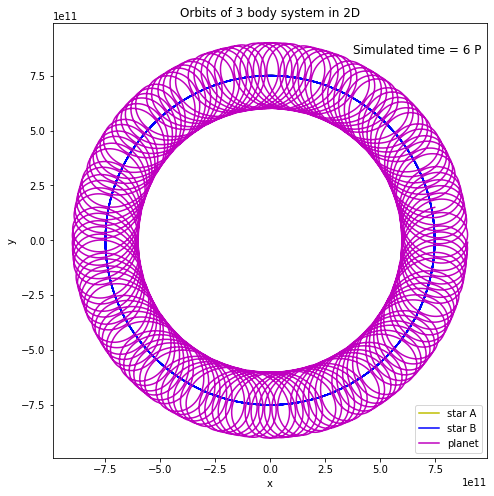

In [249]:
plt.figure(figsize = (8,8))

plt.plot(x1_[:l], y1_[:l], 'y-', label = 'star A')
plt.plot(x2_[:l], y2_[:l], 'b-', label = 'star B')
plt.plot(x3_[:l], y3_[:l], 'm-', label = 'planet')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbits of 3 body system in 2D')
plt.text(3.8e11, 8.5e11, 'Simulated time = 6 P', fontsize = 12)
plt.legend(loc = 'lower right')

# plt.text(7.5e11, 7.5e11, 'S-type orbit', fontsize = 12)
# plt.text(7.9e11, 7.9e11, 'RK4', fontsize = 12)
# plt.xlim((3,4))
# plt.ylim((-1, 1))

plt.gca().set_aspect('equal')
plt.show()

In [213]:
#Relative coordinates for planet wrt star A
#Define function for this

x3_rel_ = x3_ - x1_
y3_rel_ = y3_ - y1_
z3_rel_ = z3_ - z1_

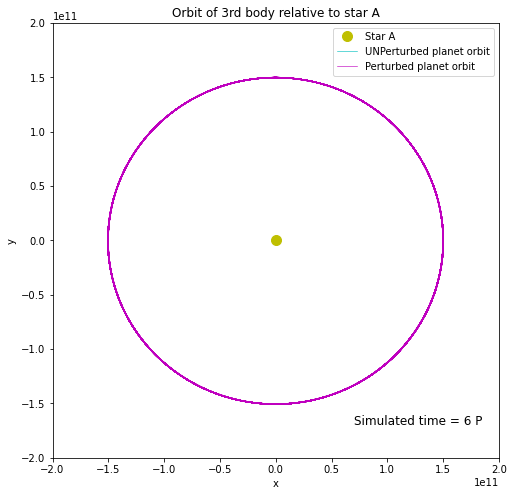

In [224]:
plt.figure(figsize = (8,8))

plt.plot(0,0,'yo', markersize = 10, label = 'Star A')
plt.plot(circular_orb_x[0], circular_orb_y[0], 'c-', linewidth = 0.6, label = 'UNPerturbed planet orbit')
plt.plot(x3_rel_, y3_rel_, 'm-', linewidth = 0., label = 'Perturbed planet orbit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit of 3rd body relative to star A')
plt.text(0.7e11, -1.7e11, 'Simulated time = 6 P', fontsize = 12)
plt.xlim((-2e11,2e11))
plt.ylim((-2e11, 2e11))
plt.legend()
plt.show()

# CHANGING PLANET DISTANCE FROM STAR A

# Far away

In [216]:
planet_distance = np.linspace(4*AU, 5*AU, 10)
n = len(planet_distance)

x30_arr = np.zeros(n) + x10
y30_arr = planet_distance + y10
z30_arr = np.zeros(n) + z10

v_arr = np.sqrt(G*(m1+m3)/np.sqrt((x30_arr-x10)**2 + (y30_arr-y10)**2 + (z30_arr-z10)**2))

#Define a function for angular speed
omega_arr = 2*np.pi*(v_arr/planet_distance)

v3x0_arr = -v_arr + v1x0
v3y0_arr = np.zeros(n) + v1y0
v3z0_arr = np.zeros(n) + v1z0


In [217]:
#Define function for this

circular_orb_x = np.zeros((n, N3))
circular_orb_y = np.zeros((n, N3))
for i in range(n):
    circular_orb_x[i,:] = planet_distance[i]*np.cos(omega_arr[i]*times3)
    circular_orb_y[i,:] = planet_distance[i]*np.sin(omega_arr[i]*times3)


In [143]:
x1_arr = []
y1_arr = []
z1_arr = []

x2_arr = []
y2_arr = []
z2_arr = []

x3_arr = []
y3_arr = []
z3_arr = []

for i in range(n):
    
    inits_3body = [x10,y10,z10, x20,y20,z20, x30_arr[i],y30_arr[i],z30_arr[i], v1x0, v1y0, v1z0, v2x0, v2y0, v2z0, v3x0_arr[i], v3y0_arr[i], v3z0_arr[i]]
    
    solve_3body_ = RK4(coupledDE_3body, t_arr=times3, v0=inits_3body )

    x1_arr.append(solve_3body_[0])
    y1_arr.append(solve_3body_[1])
    z1_arr.append(solve_3body_[2])

    x2_arr.append(solve_3body_[3])
    y2_arr.append(solve_3body_[4])
    z2_arr.append(solve_3body_[5])

    x3_arr.append(solve_3body_[6])
    y3_arr.append(solve_3body_[7])
    z3_arr.append(solve_3body_[8])
    
x1_arr = np.array(x1_arr)
y1_arr = np.array(y1_arr)
z1_arr = np.array(z1_arr)

x2_arr = np.array(x2_arr)
y2_arr = np.array(y2_arr)
z2_arr = np.array(z2_arr)

x3_arr = np.array(x3_arr)
y3_arr = np.array(y3_arr)
z3_arr = np.array(z3_arr)


simulated time = 6P


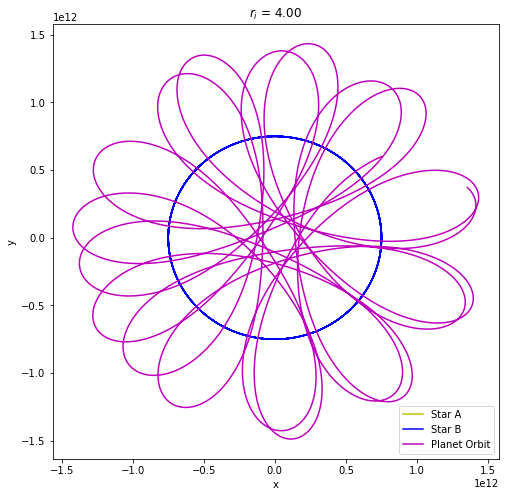

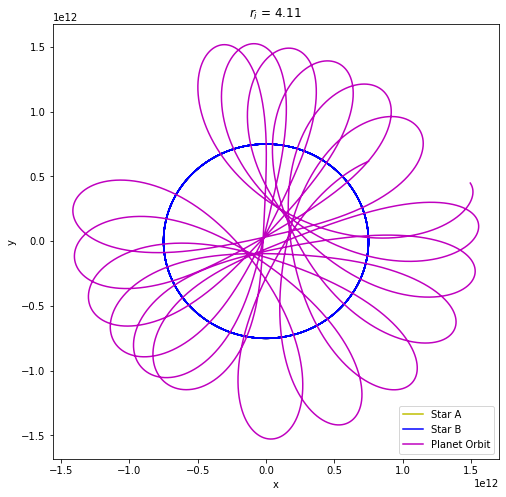

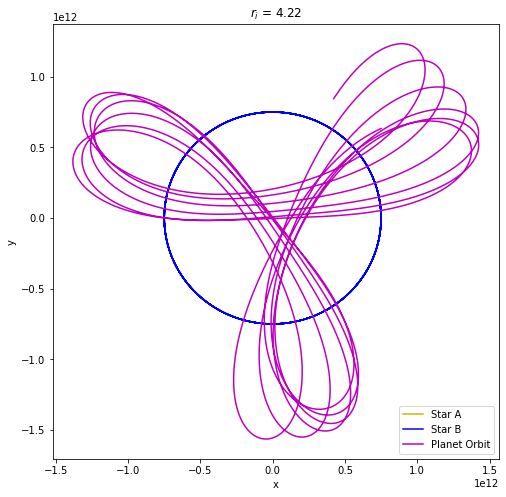

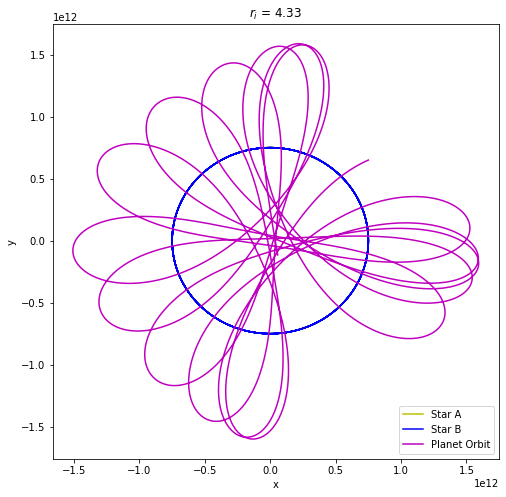

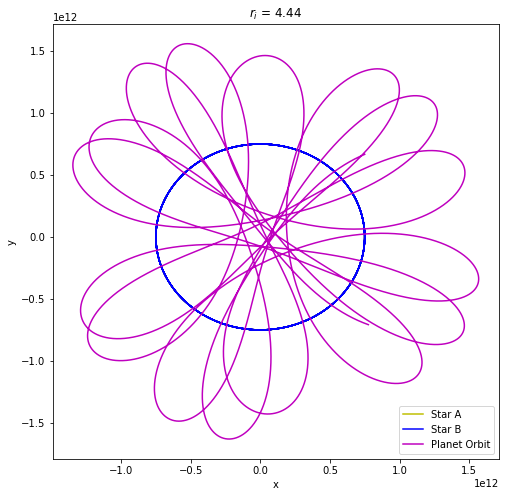

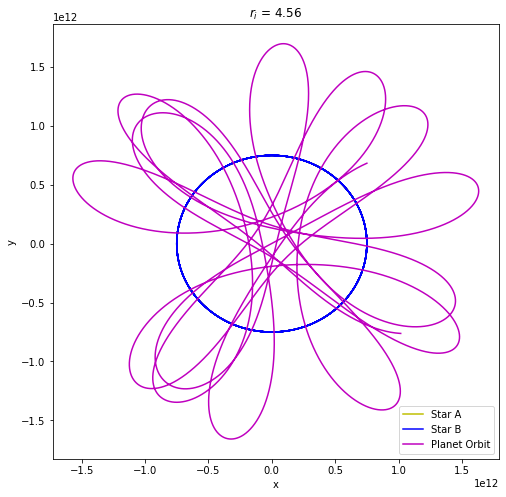

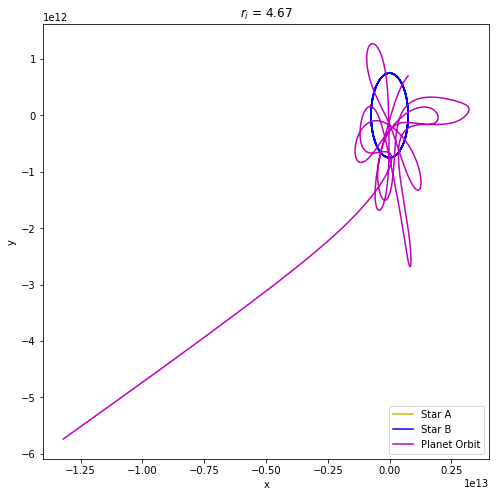

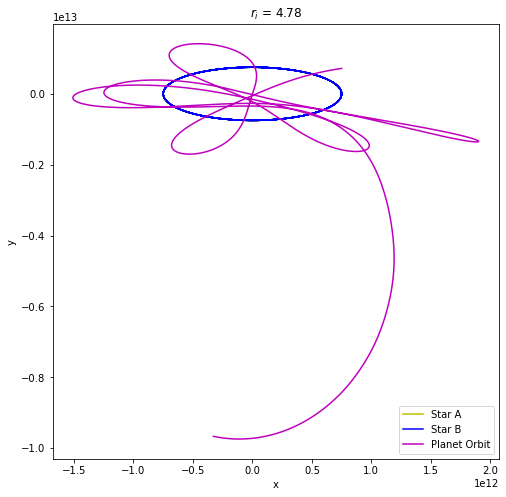

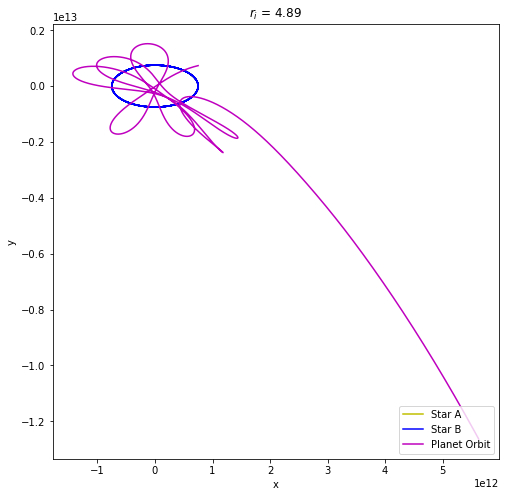

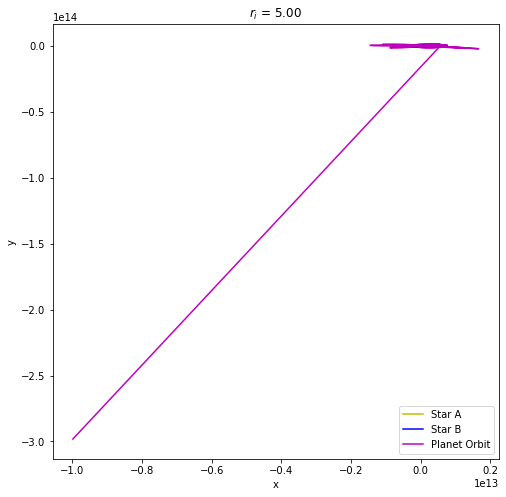

In [280]:
planet_distance_scaled = planet_distance/AU

print('simulated time = 6P')

for i in range(n):
    plt.figure(figsize = (8,8))
    
    plt.plot(x1_arr[i], y1_arr[i], 'y-', label = 'Star A')
    plt.plot(x2_arr[i], y2_arr[i], 'b-', label = 'Star B')
    plt.plot(x3_arr[i], y3_arr[i], 'm-', label = 'Planet Orbit')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$r_i$ = '+str("%.2f" % planet_distance_scaled[i]))
    plt.legend(loc = 'lower right')

    #plt.gca().set_aspect('equal')
    
    plt.show()

In [220]:
#Relative coordinates of planet wrt star A
#Define a function for relative position

x3_rel_arr = x3_arr - x1_
y3_rel_arr = y3_arr - y1_
z3_rel_arr = z3_arr - z1_

simulated time = 6P


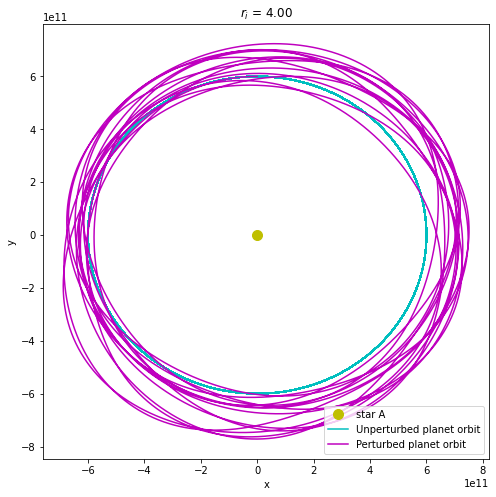

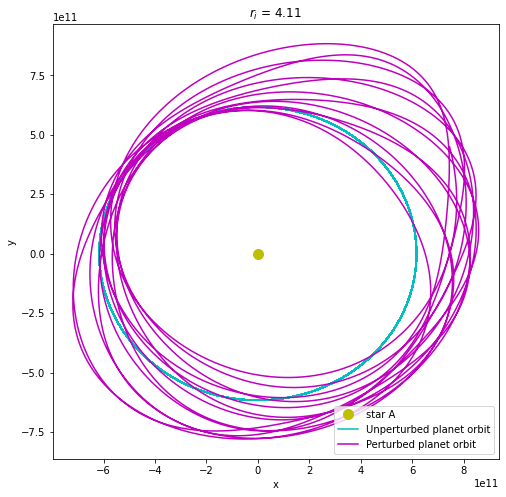

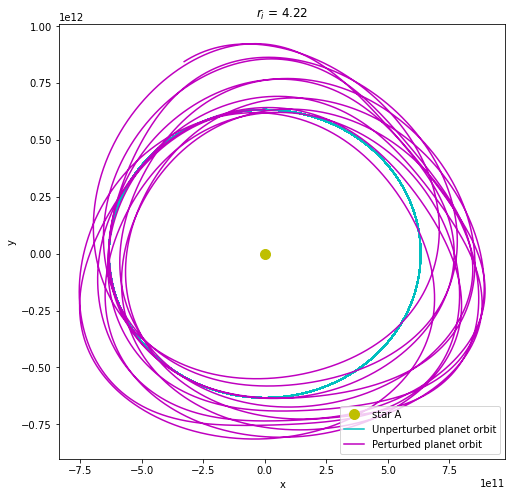

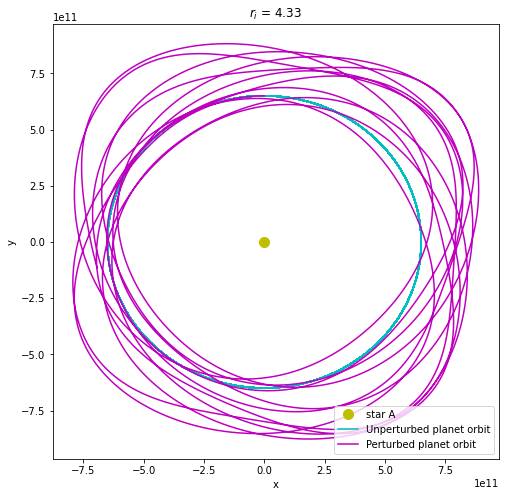

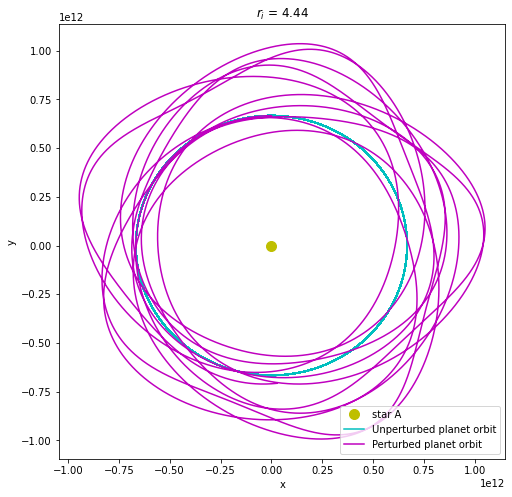

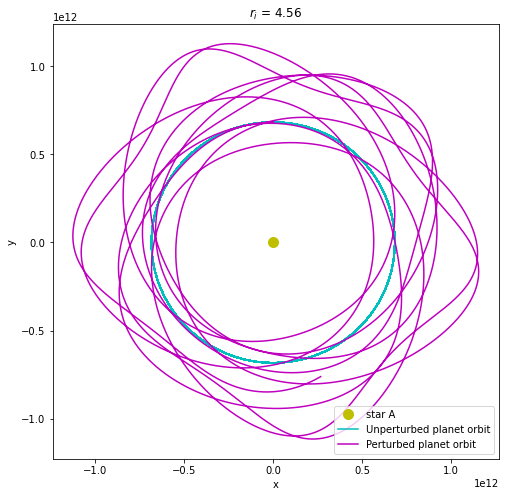

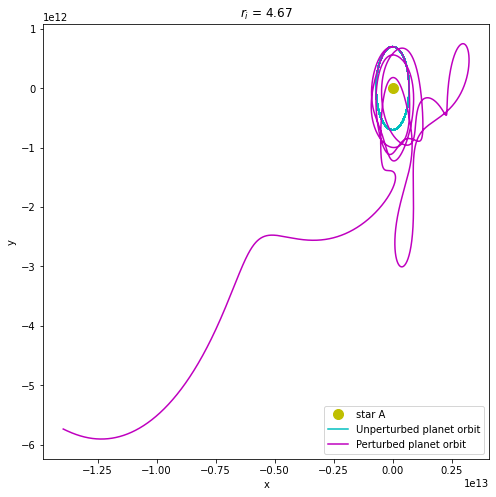

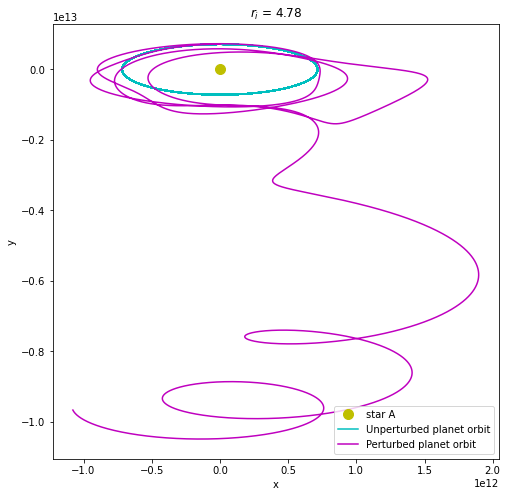

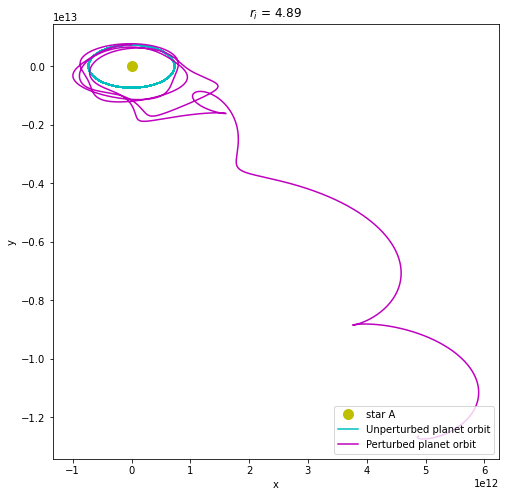

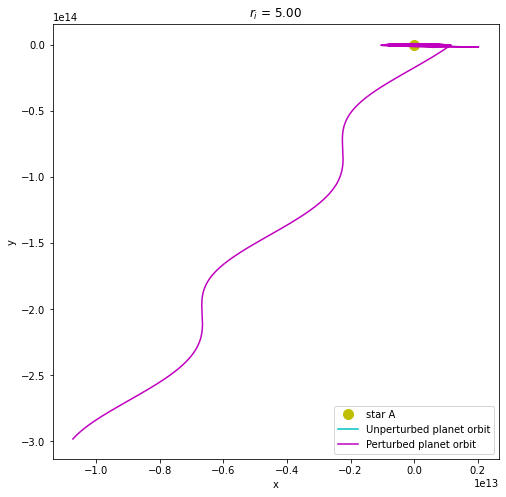

In [230]:
print('simulated time = 6P')
for i in range(n):
    plt.figure(figsize = (8,8))
    
    plt.plot(0,0, 'yo', markersize = 10, label = 'star A')
    plt.plot(circular_orb_x[i,:], circular_orb_y[i,:], 'c-', label = 'Unperturbed planet orbit')
    plt.plot(x3_rel_arr[i], y3_rel_arr[i], 'm-', label = 'Perturbed planet orbit')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$r_i$ = '+str("%.2f" % planet_distance_scaled[i]))
    plt.legend(loc = 'lower right')
    
    # plt.xlim((3,4))
    # plt.ylim((-1, 1))
    #plt.gca().set_aspect('equal')
    
    plt.show()

# Close to Star A

In [273]:
planet_distance1 = np.linspace(1*AU, 4*AU, 4)
n1 = len(planet_distance1)

x30_arr1 = np.zeros(n1) + x10
y30_arr1 = planet_distance1 + y10
z30_arr1 = np.zeros(n1) + z10

v_arr1 = np.sqrt(G*(m1+m3)/np.sqrt((x30_arr1-x10)**2 + (y30_arr1-y10)**2 + (z30_arr1-z10)**2))
omega_arr1 = 2*np.pi*(v_arr1/planet_distance1)

v3x0_arr1 = -v_arr1 + v1x0
v3y0_arr1 = np.zeros(n1) + v1y0
v3z0_arr1 = np.zeros(n1) + v1z0

# planet_distance1

In [274]:
x1_arr1 = []
y1_arr1 = []
z1_arr1 = []

x2_arr1 = []
y2_arr1 = []
z2_arr1 = []

x3_arr1 = []
y3_arr1 = []
z3_arr1 = []

for i in range(n1):
    
    inits_3body = [x10,y10,z10, x20,y20,z20, x30_arr1[i],y30_arr1[i],z30_arr1[i], v1x0, v1y0, v1z0, v2x0, v2y0, v2z0, v3x0_arr1[i], v3y0_arr1[i], v3z0_arr1[i]]
    
    solve_3body_ = RK4(coupledDE_3body, t_arr=times3, v0=inits_3body )

    x1_arr1.append(solve_3body_[0])
    y1_arr1.append(solve_3body_[1])
    z1_arr1.append(solve_3body_[2])

    x2_arr1.append(solve_3body_[3])
    y2_arr1.append(solve_3body_[4])
    z2_arr1.append(solve_3body_[5])

    x3_arr1.append(solve_3body_[6])
    y3_arr1.append(solve_3body_[7])
    z3_arr1.append(solve_3body_[8])
    
x1_arr1 = np.array(x1_arr1)
y1_arr1 = np.array(y1_arr1)
z1_arr1 = np.array(z1_arr1)

x2_arr1 = np.array(x2_arr1)
y2_arr1 = np.array(y2_arr1)
z2_arr1 = np.array(z2_arr1)

x3_arr1 = np.array(x3_arr1)
y3_arr1 = np.array(y3_arr1)
z3_arr1 = np.array(z3_arr1)


simulated time = 6P


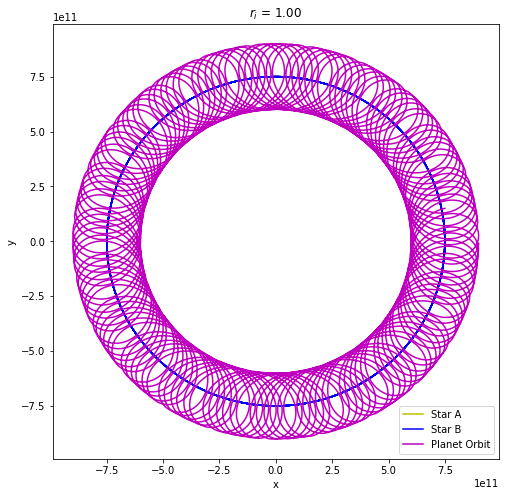

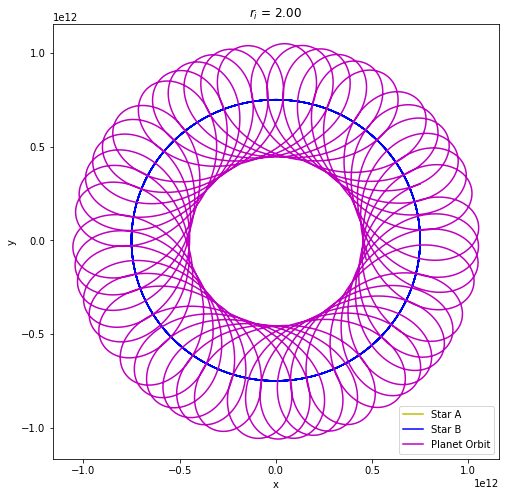

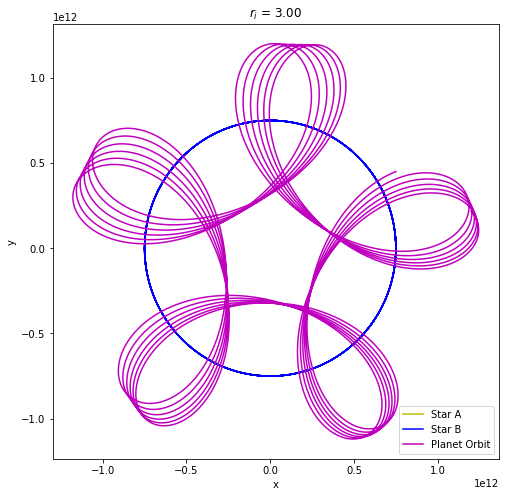

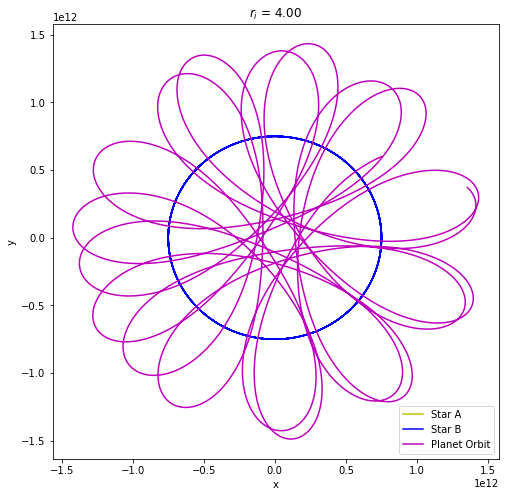

In [282]:
planet_distance1_scaled = planet_distance1/AU

print('simulated time = 6P')

for i in range(n1):
    plt.figure(figsize = (8,8))
    
    plt.plot(x1_arr1[i], y1_arr1[i], 'y-', label = 'Star A')
    plt.plot(x2_arr1[i], y2_arr1[i], 'b-', label = 'Star B')
    plt.plot(x3_arr1[i], y3_arr1[i], 'm-', label = 'Planet Orbit')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$r_i$ = '+str("%.2f" % planet_distance1_scaled[i]))
    plt.legend(loc = 'lower right')
    # plt.xlim((3,4))
    # plt.ylim((-1, 1))
#     plt.gca().set_aspect('equal')

    plt.show()

In [276]:
#Define function for this

circular_orb_x1 = np.zeros((n, N3))
circular_orb_y1 = np.zeros((n, N3))
for i in range(n1):
    circular_orb_x1[i,:] = planet_distance1[i]*np.cos(omega_arr1[i]*times3)
    circular_orb_y1[i,:] = planet_distance1[i]*np.sin(omega_arr1[i]*times3)
    
    
#Relative coordinates of planet wrt star A
#Define a function for relative position

x3_rel_arr1 = x3_arr1 - x1_
y3_rel_arr1 = y3_arr1 - y1_
z3_rel_arr1 = z3_arr1 - z1_


simulated time = 6P


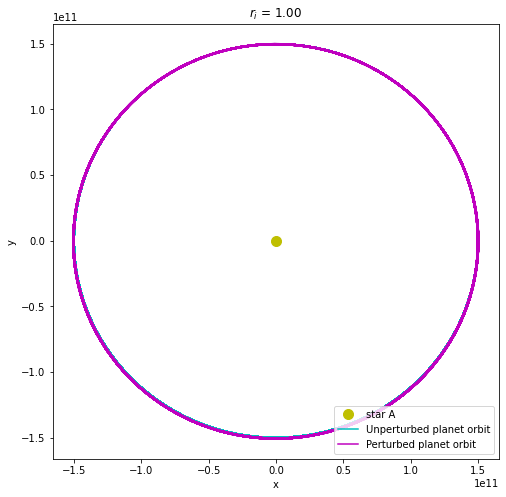

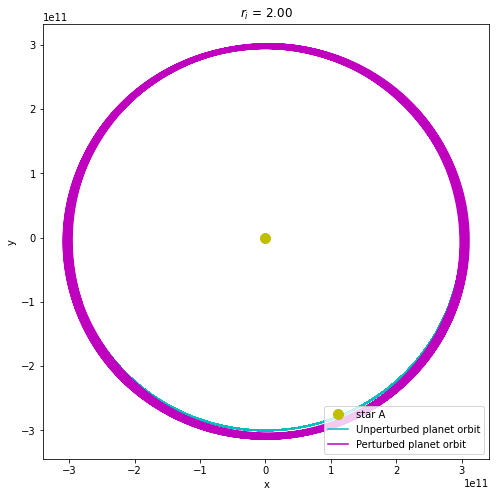

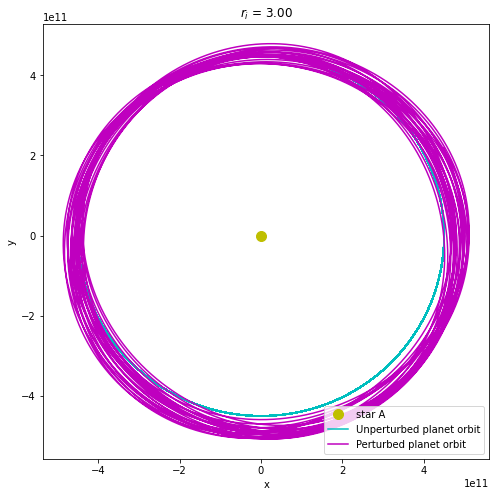

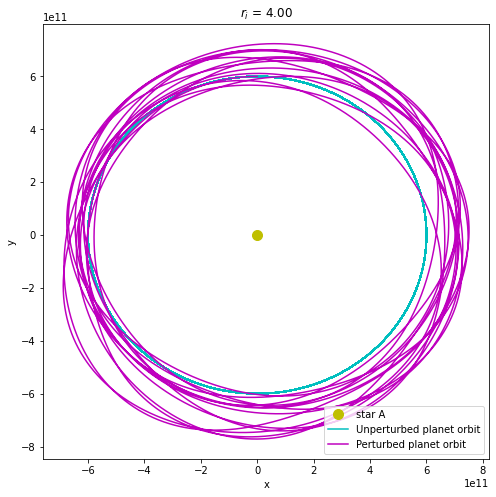

In [284]:
print('simulated time = 6P')
for i in range(n1):
    plt.figure(figsize = (8,8))
    
    plt.plot(0,0, 'yo', markersize = 10, label = 'star A')
    plt.plot(circular_orb_x1[i,:], circular_orb_y1[i,:], 'c-', label = 'Unperturbed planet orbit')
    plt.plot(x3_rel_arr1[i], y3_rel_arr1[i], 'm-', label = 'Perturbed planet orbit')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$r_i$ = '+str("%.2f" % planet_distance1_scaled[i]))
    plt.legend(loc = 'lower right')
    
    # plt.xlim((3,4))
    # plt.ylim((-1, 1))
    #plt.gca().set_aspect('equal')
    
    plt.show()

# Unstable orbit

In [121]:
x30 = 0 + x10
y30 = 4.7*AU + y10
z30 = 0 + z10

v_planet = np.sqrt(G*(m1+m3)/np.sqrt((x30-x10)**2 + (y30-y10)**2 + (z30-z10)**2))

v3x0 = -v_planet + v1x0
v3y0 = 0 + v1y0
v3z0 = 0 + v1z0

v_planet

13755.741214293395

In [122]:
N3 = 20000
Tmax3= 6*P2
times3 = np.linspace(0,Tmax3,N3)

inits_3body = [x10,y10,z10, x20,y20,z20, x30,y30,z30, v1x0, v1y0, v1z0, v2x0, v2y0, v2z0, v3x0, v3y0, v3z0]

In [123]:
solve_3body_ = RK4(coupledDE_3body, t_arr=times3, v0=inits_3body )

x1_ = solve_3body_[0]
y1_ = solve_3body_[1]
z1_ = solve_3body_[2]

x2_ = solve_3body_[3]
y2_ = solve_3body_[4]
z2_ = solve_3body_[5]

x3_ = solve_3body_[6]
y3_ = solve_3body_[7]
z3_ = solve_3body_[8]

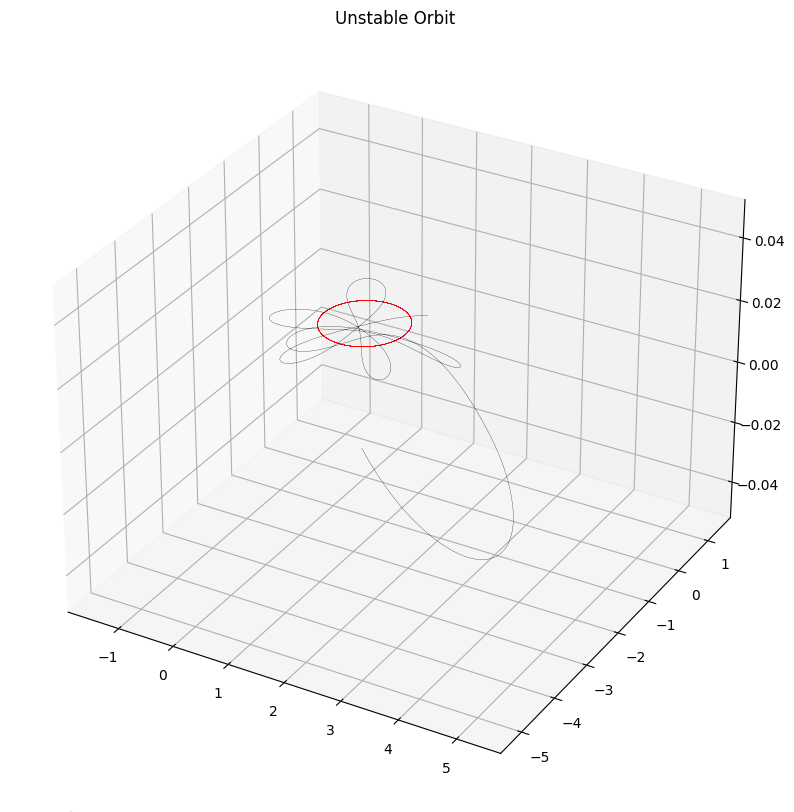

In [124]:
l = N3

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(x1_[:l],y1_[:l],z1_[:l],'b-', linewidth = 0.2)
ax.plot3D(x2_[:l],y2_[:l],z2_[:l],'r-', linewidth = 0.2)
ax.plot3D(x3_[:l],y3_[:l],z3_[:l],'k-', linewidth = 0.2)
ax.set_title('Unstable Orbit')
plt.show()

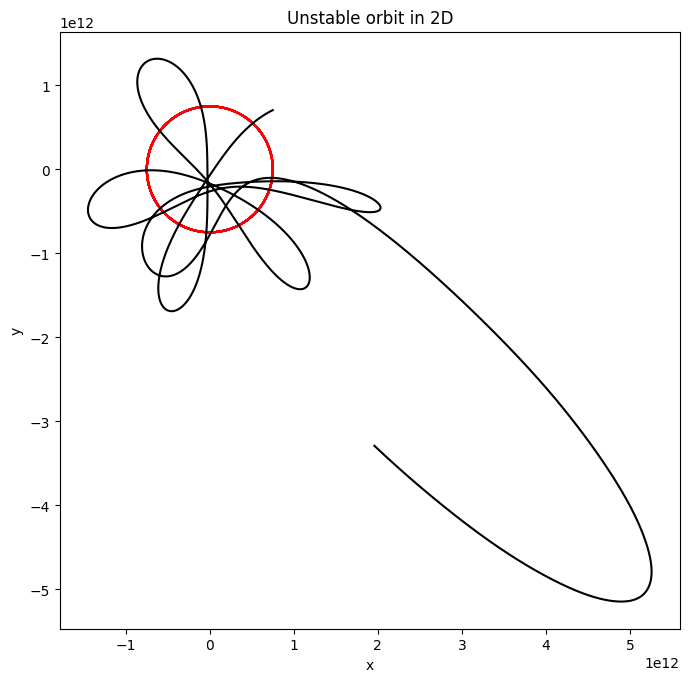

In [125]:
plt.figure(figsize = (8,8))

plt.plot(x1_[:l], y1_[:l], 'b-')
plt.plot(x2_[:l], y2_[:l], 'r-')
plt.plot(x3_[:l], y3_[:l], 'k-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Unstable orbit in 2D')
# plt.xlim((3,4))
# plt.ylim((-1, 1))
plt.gca().set_aspect('equal')
plt.show()

In [126]:
#Relative coordinates of planet wrt frame of star A

x3_rel_ = x3_ - x1_
y3_rel_ = y3_ - y1_
z3_rel_ = z3_ - z1_

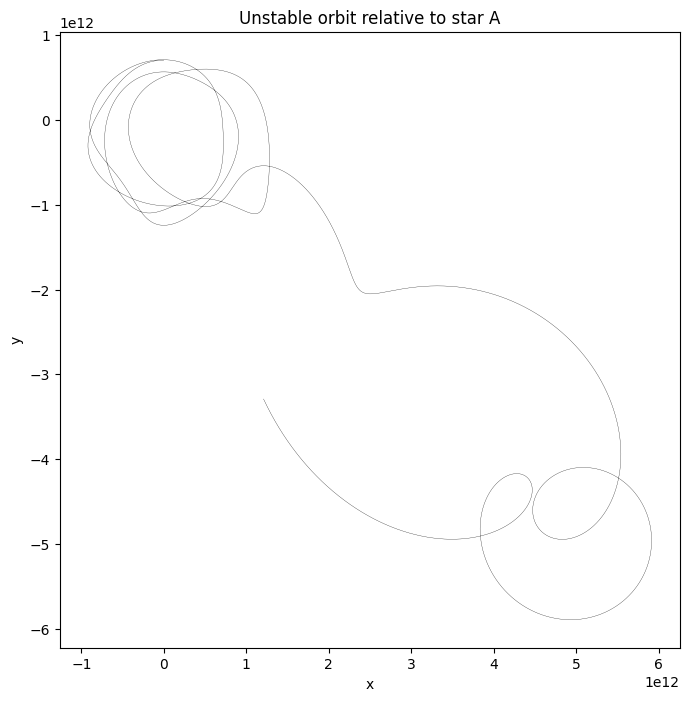

In [127]:
plt.figure(figsize = (8,8))
plt.plot(x3_rel_, y3_rel_, 'k-', linewidth = 0.2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Unstable orbit relative to star A')
# plt.xlim((0,1.5))
# plt.ylim((-1, 1))
plt.show()

# SCOPE OF MORE WORK

1. Increase mass of the planet and do the same process.
2. Estimate $<r(t) - r_i>$ for longer time periods
3. Estimate the time in which the planet starts to show unstable behaviour
4. Take orbits of general ecentricity both for the stars and the planet
5. What happens if the orbit of the planet and the binary orbits don't lie in a plane

# REFERENCES

1. On the stability of planetary orbits in binary star systems I. The S-type orbits, G. De Cesare, R. Capuzzo-Dolcetta, 2021, astro-ph.EP
2. Galactic Dynamics, Binney Tremaine
3. The three body problem, Musielak, Z.E., Quarles, B., Reports on Progress in Physics, 2014


In [ ]:
# gs = GridSpec(2,2)
